In [1]:
# add the library
import os
import sys
sys.path.append("../src")

# and import the necessary libraries
import numpy as np
from stmdeconvpy import deconvolve
from stmdeconvpy import profiles
deconvolve.kinetic_quench = 1e-5 # parameter determining how sharp signal to target in the deconvolution

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

import matplotlib.pyplot as plt

# See how to deconvolve a superconducting profile

In [2]:
xs = np.linspace(-2.0,2.0,1000)

# define filtering signal (the STM tip)
yf = profiles.dynes_superconductor(delta=0.2,gamma=0.01)(xs)
yf = yf/np.mean(yf)


# define the real signal, two inelastic steps
y0 = profiles.step_tip(delta=1.2,lowest=0.1,highest=1.0)(xs)
y0 += profiles.step_tip(delta=0.8,lowest=0.1,highest=1.0)(xs)
y0 += profiles.step_tip(delta=1.4,lowest=0.,highest=0.4)(xs)
y0 = y0/np.mean(y0) # normalize

# compute the dIdV associated to that DOS
(xc,yc) = deconvolve.dos2dIdV(xs,y0,xs,yf)
yc = yc/np.mean(yc) # normalize


# deconvolve the signal, from dIdV 2 DOS
xn,ydc = deconvolve.dIdV2dos(xs,yc,xs,yf,n=300,mode="minimize")
#ydc = ydc/np.max(ydc)

# and do it again to compare
(xc2,yc2) = deconvolve.dos2dIdV(xs,ydc,xs,yf)
yc2 = yc2/np.mean(yc2)


Error in this minimization 9.476076e-09
Best deconvolution out of 1 has error 9.476076e-09


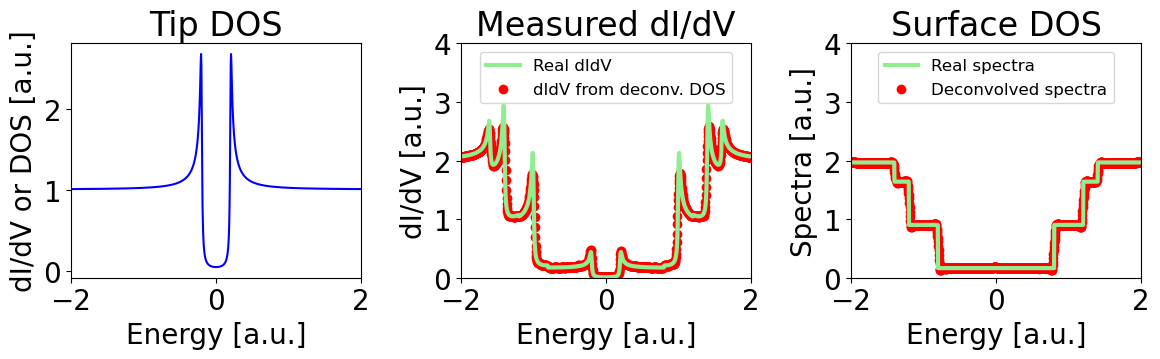

In [3]:
fig = plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.title("Tip DOS")
plt.plot(xs,yf,label="Tip DOS",c="blue")
plt.xlim([np.min(xs),np.max(xs)])
plt.xlabel("Energy [a.u.]")
plt.ylabel("dI/dV or DOS [a.u.]")



plt.subplot(1,3,2)
plt.title("Measured dI/dV")
plt.plot(xc,yc,label="Real dIdV",c="lightgreen",linewidth=3)
plt.scatter(xc2,yc2,label="dIdV from deconv. DOS",c="red")
plt.xlim([np.min(xs),np.max(xs)])
plt.xlabel("Energy [a.u.]")
plt.ylabel("dI/dV [a.u.]")
plt.legend(fontsize=12,loc='upper center',ncol=1)
plt.ylim([0.,4.])


plt.subplot(1,3,3)
plt.title("Surface DOS")
plt.plot(xs,y0,label="Real spectra",c="lightgreen",linewidth=3)
plt.scatter(xn,ydc,label="Deconvolved spectra",c="red")
plt.xlim([np.min(xs),np.max(xs)])
plt.xlabel("Energy [a.u.]")
plt.ylabel("Spectra [a.u.]")
plt.legend(fontsize=12,loc='upper center',ncol=1)
plt.ylim([0.,4.])

plt.tight_layout()